# Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Reading the Dataset

In [3]:
center_info = pd.read_csv(r'Dataset/fulfilment_center_info.csv')
meal_info = pd.read_csv(r'Dataset/meal_info.csv')
train_data = pd.read_csv(r'Dataset/train.csv')
test_data = pd.read_csv(r'Dataset/test.csv')

# Exploratory Data Analysis

In [4]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [5]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [6]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [7]:
test_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured
0,1028232,146,55,1885,158.11,159.11,0,0
1,1127204,146,55,1993,160.11,159.11,0,0
2,1212707,146,55,2539,157.14,159.14,0,0
3,1082698,146,55,2631,162.02,162.02,0,0
4,1400926,146,55,1248,163.93,163.93,0,0


In [8]:
print(train_data.shape, test_data.shape)

(456548, 9) (32573, 8)


In [9]:
train_data.num_orders.describe()

count    456548.000000
mean        261.872760
std         395.922798
min          13.000000
25%          54.000000
50%         136.000000
75%         324.000000
max       24299.000000
Name: num_orders, dtype: float64

In [10]:
(train_data.center_id.unique())

array([ 55,  24,  11,  83,  32,  13, 109,  52,  93, 186, 146,  57, 149,
        89, 124, 152,  97,  74, 108,  99,  66,  94,  91,  20,  34, 137,
        92, 126,  36, 162,  75, 177,  27, 157, 106,  64, 129,  14,  17,
       153, 139, 161,  81,  26,  73,  50, 104,  42, 113, 145,  53,  72,
        67, 174,  29,  77,  41,  30,  76,  59,  88, 143,  58,  10, 101,
        80,  43,  65,  39, 102, 110, 132,  23,  86,  68,  51,  61])

In [11]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [12]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32573 entries, 0 to 32572
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     32573 non-null  int64  
 1   week                   32573 non-null  int64  
 2   center_id              32573 non-null  int64  
 3   meal_id                32573 non-null  int64  
 4   checkout_price         32573 non-null  float64
 5   base_price             32573 non-null  float64
 6   emailer_for_promotion  32573 non-null  int64  
 7   homepage_featured      32573 non-null  int64  
dtypes: float64(2), int64(6)
memory usage: 2.0 MB


# Checking For Null Values

In [13]:
print(train_data.isnull().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64


In [14]:
print(train_data.isna().sum())

id                       0
week                     0
center_id                0
meal_id                  0
checkout_price           0
base_price               0
emailer_for_promotion    0
homepage_featured        0
num_orders               0
dtype: int64


# Merge Datasets

In [15]:
final_train = pd.merge(train_data, meal_info, on="meal_id", how="outer")
final_train = pd.merge(final_train, center_info, on="center_id", how="outer")
final_train.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,55,1885,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,55,1885,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,55,1885,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,55,1885,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


# Dropping columns

In [16]:
final_train = final_train.drop(['center_id', 'meal_id'], axis=1)
final_train.head()

,id,week,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1018704,2,135.83,152.29,0,0,323,Beverages,Thai,647,56,TYPE_C,2.0
2,1196273,3,132.92,133.92,0,0,96,Beverages,Thai,647,56,TYPE_C,2.0
3,1116527,4,135.86,134.86,0,0,163,Beverages,Thai,647,56,TYPE_C,2.0
4,1343872,5,146.50,147.50,0,0,215,Beverages,Thai,647,56,TYPE_C,2.0


In [17]:
cols = final_train.columns.tolist()
print(cols)

['id', 'week', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders', 'category', 'cuisine', 'city_code', 'region_code', 'center_type', 'op_area']


In [18]:
cols = cols[:2] + cols[9:] + cols[7:9] + cols[2:7]
print(cols)

['id', 'week', 'city_code', 'region_code', 'center_type', 'op_area', 'category', 'cuisine', 'checkout_price', 'base_price', 'emailer_for_promotion', 'homepage_featured', 'num_orders']


In [19]:
final_train = final_train[cols]
final_train.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type               object
op_area                  float64
category                  object
cuisine                   object
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

Object data have to be Label Encoded before proceeding to Model fitting

# Feature Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

final_train['center_type'] = le.fit_transform(final_train['center_type'])
final_train['category'] = le.fit_transform(final_train['category'])
final_train['cuisine'] = le.fit_transform(final_train['cuisine'])

In [21]:
final_train.head()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,647,56,2,2.0,0,3,136.83,152.29,0,0,177
1,1018704,2,647,56,2,2.0,0,3,135.83,152.29,0,0,323
2,1196273,3,647,56,2,2.0,0,3,132.92,133.92,0,0,96
3,1116527,4,647,56,2,2.0,0,3,135.86,134.86,0,0,163
4,1343872,5,647,56,2,2.0,0,3,146.50,147.50,0,0,215


In [22]:
final_train.dtypes

id                         int64
week                       int64
city_code                  int64
region_code                int64
center_type                int64
op_area                  float64
category                   int64
cuisine                    int64
checkout_price           float64
base_price               float64
emailer_for_promotion      int64
homepage_featured          int64
num_orders                 int64
dtype: object

Now, all the attributes have only numerical values

# Data Visualization

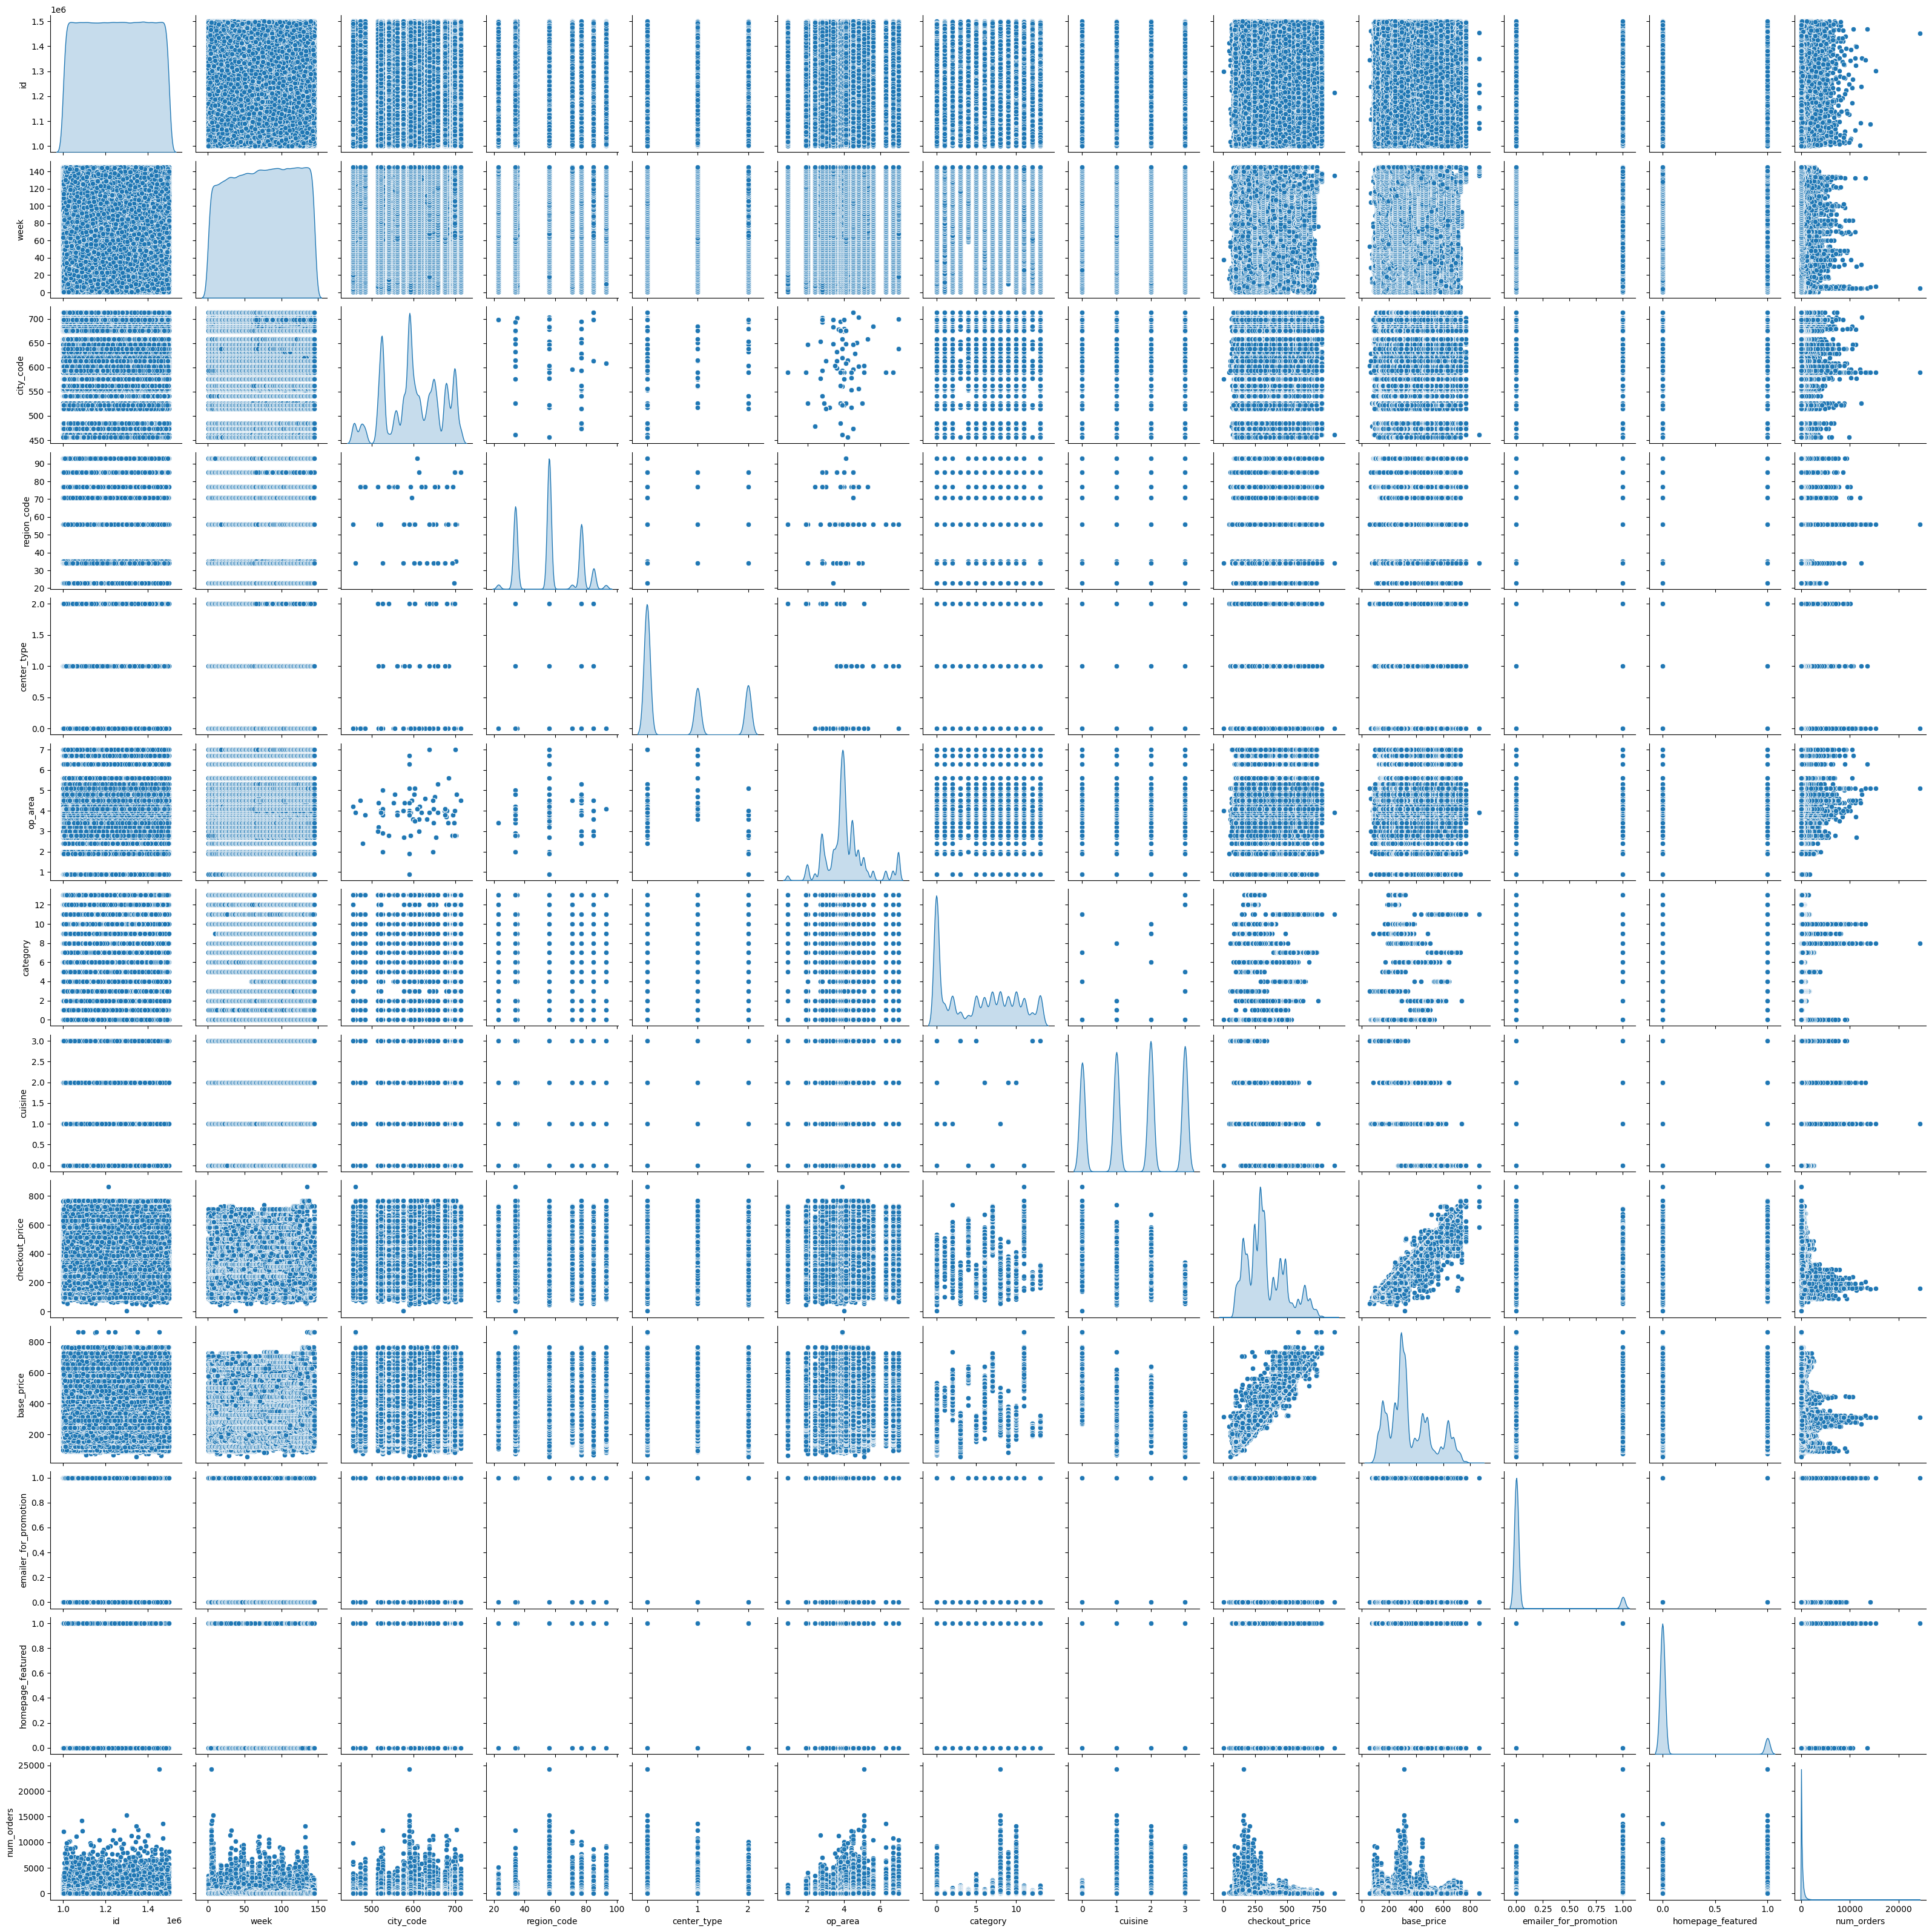

In [23]:
sns.pairplot(data=final_train, diag_kind='kde')

<AxesSubplot: xlabel='cuisine', ylabel='category'>

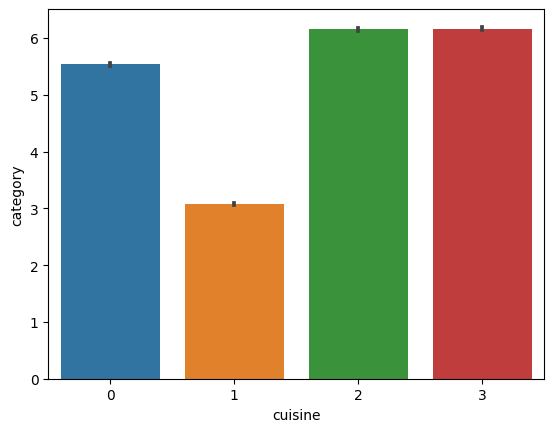

In [24]:
sns.barplot(x = final_train['cuisine'], y = final_train['category'])

<AxesSubplot: xlabel='cuisine', ylabel='num_orders'>

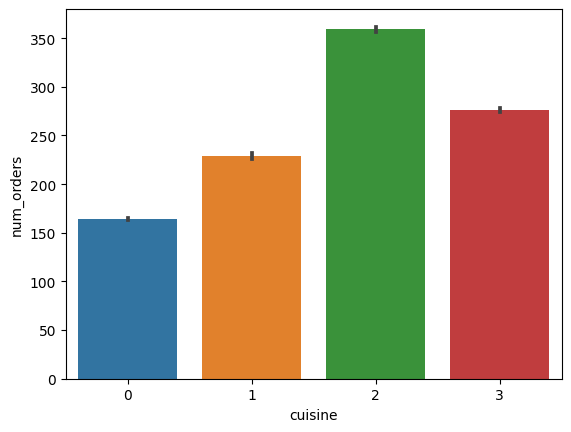

In [25]:
sns.barplot(x = final_train['cuisine'], y = final_train['num_orders'])

<AxesSubplot: ylabel='num_orders'>

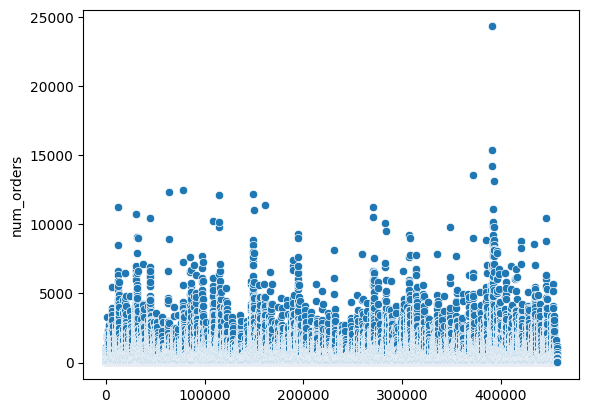

In [26]:
sns.scatterplot(final_train['num_orders'])

<AxesSubplot: >

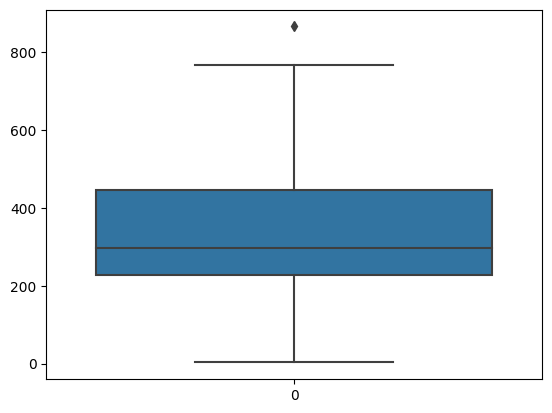

In [27]:
sns.boxplot(final_train['checkout_price'])

<AxesSubplot: >

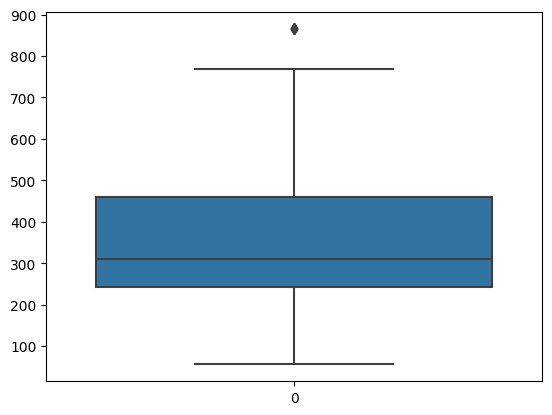

In [28]:
sns.boxplot(final_train['base_price'])

<AxesSubplot: xlabel='category'>

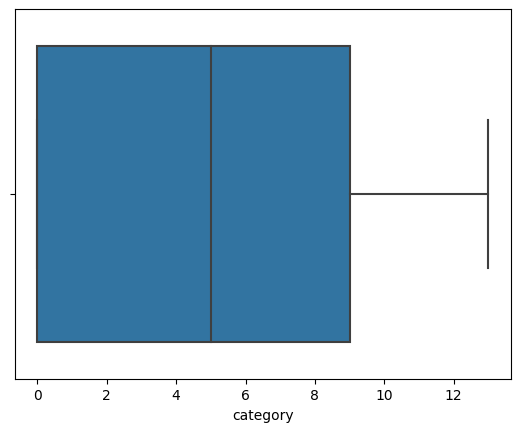

In [29]:
sns.boxplot(x=final_train['category'])

<AxesSubplot: >

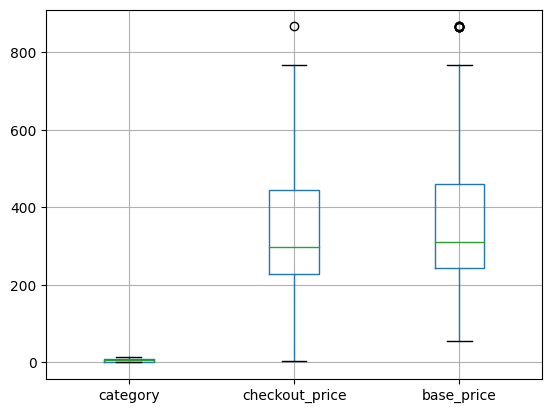

In [30]:
final_train[['category', 'checkout_price', 'base_price']].boxplot()

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'week'}>,
        <AxesSubplot: title={'center': 'city_code'}>,
        <AxesSubplot: title={'center': 'region_code'}>],
       [<AxesSubplot: title={'center': 'center_type'}>,
        <AxesSubplot: title={'center': 'op_area'}>,
        <AxesSubplot: title={'center': 'category'}>,
        <AxesSubplot: title={'center': 'cuisine'}>],
       [<AxesSubplot: title={'center': 'checkout_price'}>,
        <AxesSubplot: title={'center': 'base_price'}>,
        <AxesSubplot: title={'center': 'emailer_for_promotion'}>,
        <AxesSubplot: title={'center': 'homepage_featured'}>],
       [<AxesSubplot: title={'center': 'num_orders'}>, <AxesSubplot: >,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

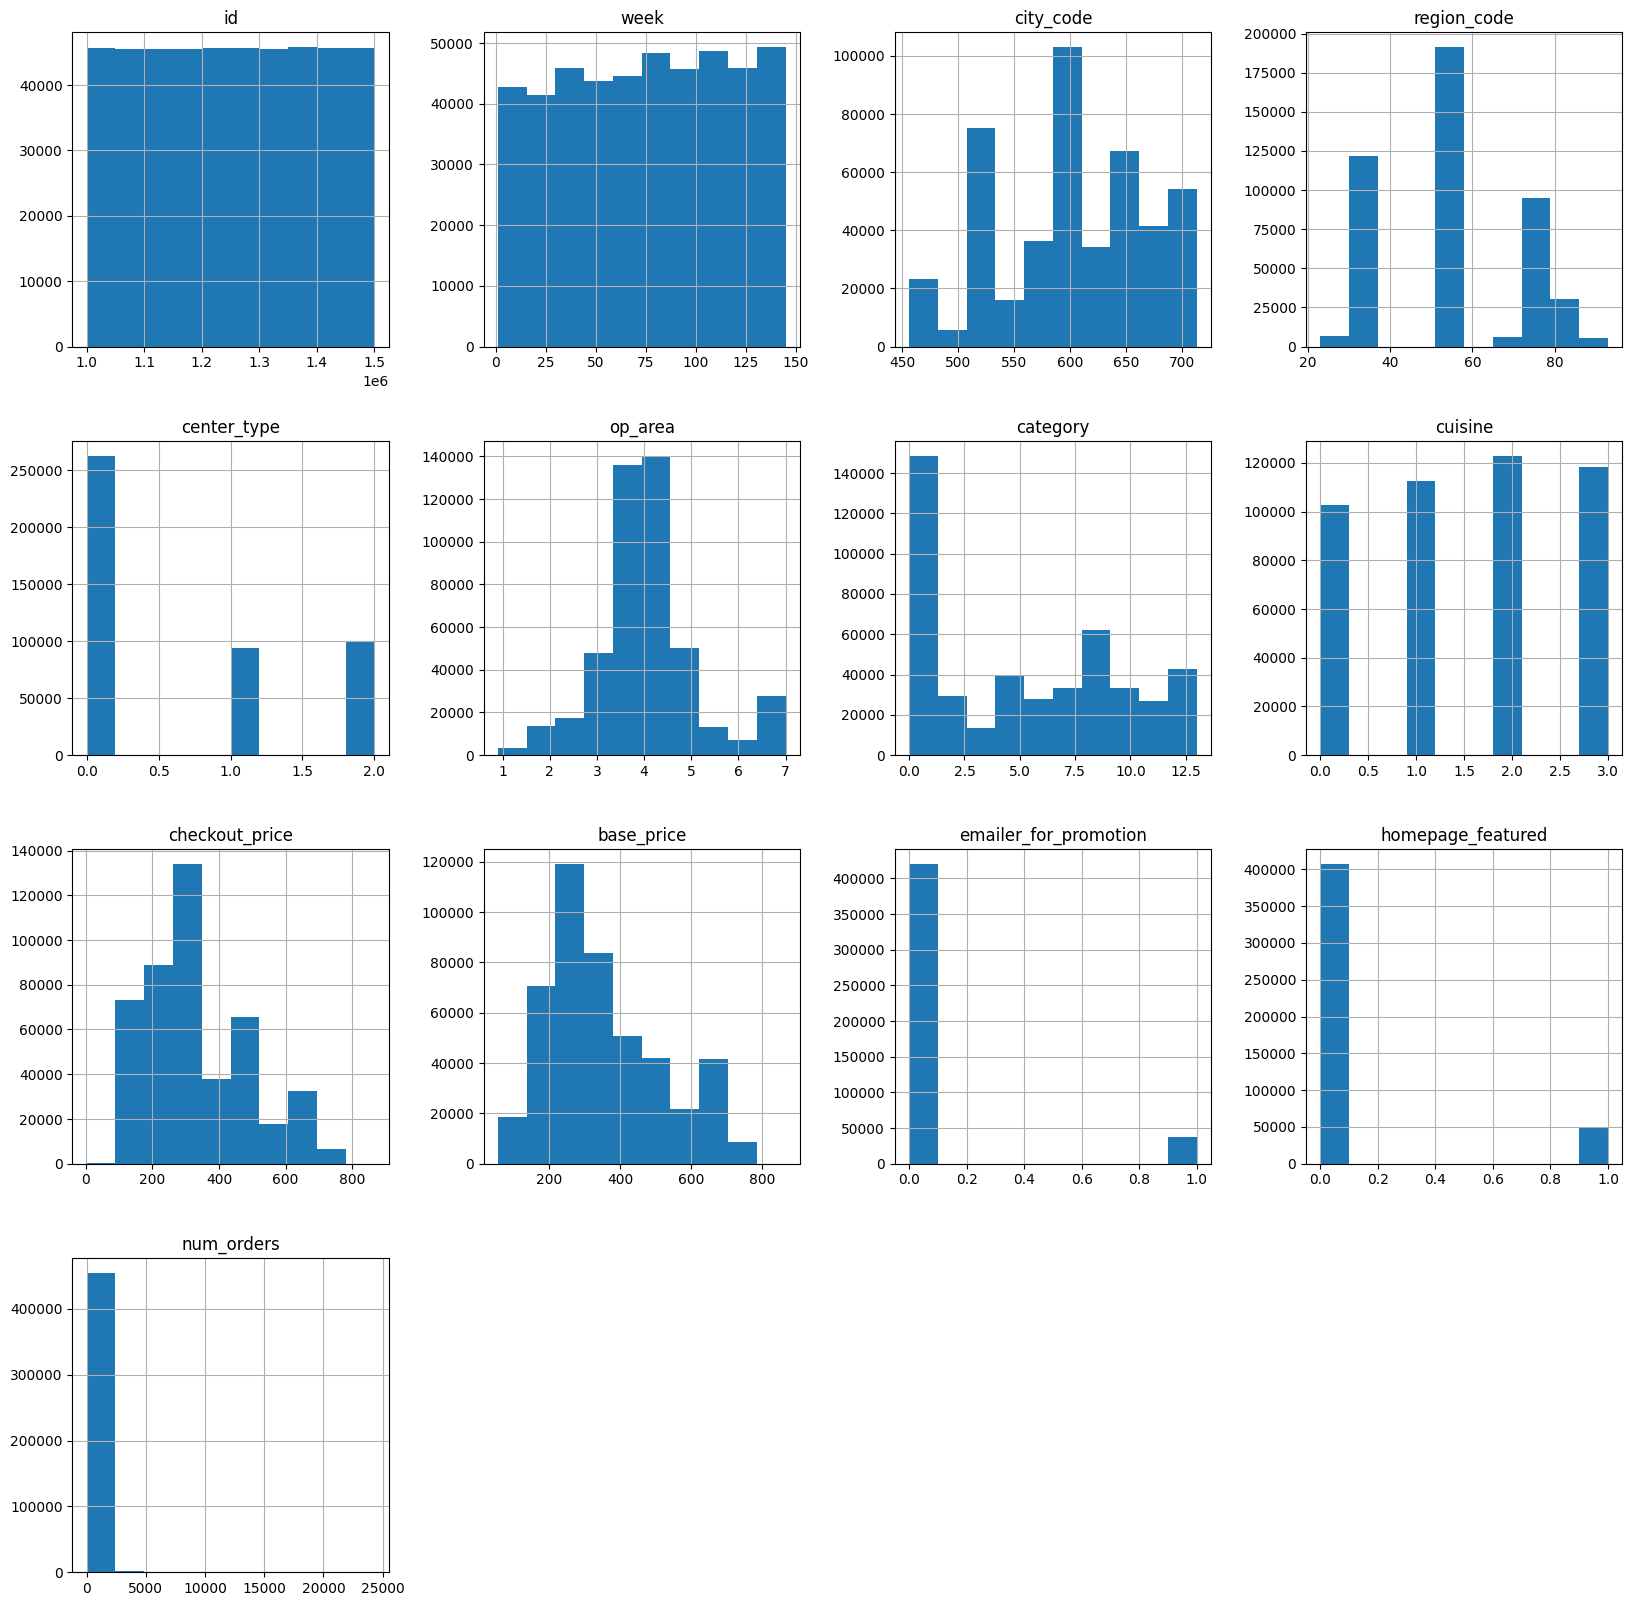

In [31]:
final_train.hist(figsize=(20,20))

In [32]:
final_train.describe()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,601.553399,56.614566,0.642342,4.083590,5.257443,1.561961,332.238933,354.156627,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,66.195914,17.641306,0.816105,1.091686,4.459965,1.101974,152.939723,160.715914,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,456.000000,23.000000,0.000000,0.900000,0.000000,0.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,553.000000,34.000000,0.000000,3.600000,0.000000,1.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,596.000000,56.000000,0.000000,4.000000,5.000000,2.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,651.000000,77.000000,1.000000,4.500000,9.000000,3.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,713.000000,93.000000,2.000000,7.000000,13.000000,3.000000,866.270000,866.270000,1.000000,1.00000,24299.000000


In [33]:
final_train_2 = final_train.drop(['id'], axis=1)
correlation = final_train_2.corr(method='pearson')
columns = correlation.nlargest(8, 'num_orders').index
columns 

Index(['num_orders', 'homepage_featured', 'emailer_for_promotion', 'op_area',
       'cuisine', 'city_code', 'region_code', 'category'],
      dtype='object')

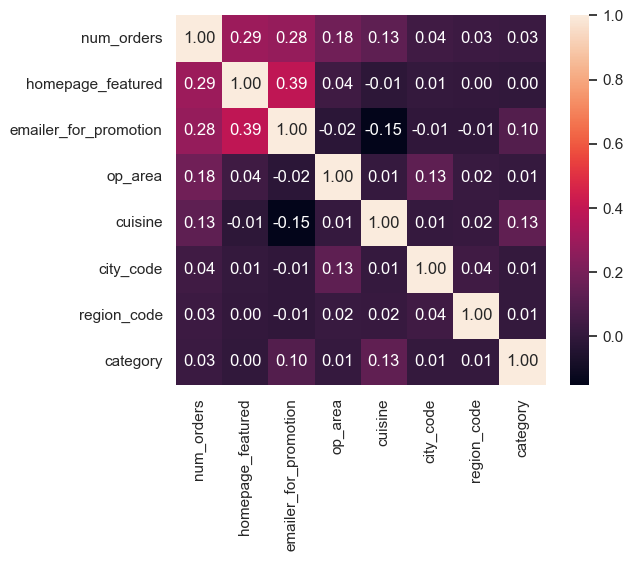

In [34]:
correlation_map = np.corrcoef(final_train_2[columns].values.T)
sns.set(font_scale=1)
heatmap = sns.heatmap(correlation_map, cbar=True, annot=True, square=True, fmt='.2f', yticklabels=columns.values, xticklabels=columns.values)
plt.show()

# Outlier Analysis

In [35]:
print(np.where(final_train['checkout_price'] > 800))
print(np.where(final_train['base_price'] > 800))

(array([53130]),)
(array([53130, 53131, 53132, 53133, 53134, 53135, 53136, 53137]),)


In [36]:
def outlier(column, value):
    q3 = column.quantile(0.75)  
    q1 = column.quantile(0.25)
    IQR = q3 - q1
    lower_limit = q1 - (IQR * 1.5)
    upper_limit = q3 + (IQR * 1.5)
    final_train[value] = np.where(column > upper_limit, upper_limit,
                        np.where(column < lower_limit, lower_limit,
                        column ))

In [37]:
outlier(final_train["checkout_price"], "checkout_price")
outlier(final_train["base_price"], "base_price")

<AxesSubplot: >

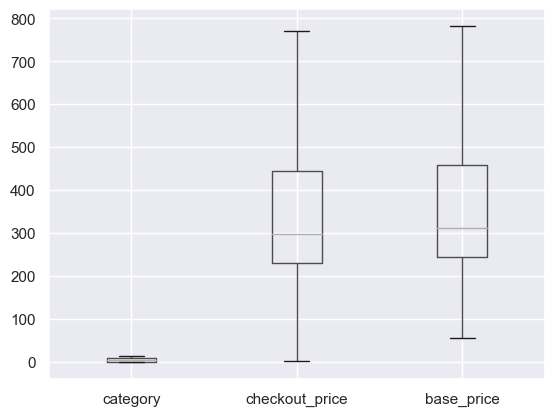

In [38]:
final_train[['category', 'checkout_price', 'base_price']].boxplot()

In [39]:
final_train.describe()

,id,week,city_code,region_code,center_type,op_area,category,cuisine,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
count,4.565480e+05,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.000000,456548.00000,456548.000000
mean,1.250096e+06,74.768771,601.553399,56.614566,0.642342,4.083590,5.257443,1.561961,332.238721,354.155163,0.081152,0.10920,261.872760
std,1.443548e+05,41.524956,66.195914,17.641306,0.816105,1.091686,4.459965,1.101974,152.939051,160.711634,0.273069,0.31189,395.922798
min,1.000000e+06,1.000000,456.000000,23.000000,0.000000,0.900000,0.000000,0.000000,2.970000,55.350000,0.000000,0.00000,13.000000
25%,1.124999e+06,39.000000,553.000000,34.000000,0.000000,3.600000,0.000000,1.000000,228.950000,243.500000,0.000000,0.00000,54.000000
50%,1.250184e+06,76.000000,596.000000,56.000000,0.000000,4.000000,5.000000,2.000000,296.820000,310.460000,0.000000,0.00000,136.000000
75%,1.375140e+06,111.000000,651.000000,77.000000,1.000000,4.500000,9.000000,3.000000,445.230000,458.870000,0.000000,0.00000,324.000000
max,1.499999e+06,145.000000,713.000000,93.000000,2.000000,7.000000,13.000000,3.000000,769.650000,781.925000,1.000000,1.00000,24299.000000


# Split Dependant and Independant variables

In [40]:
from sklearn.model_selection import train_test_split

X = final_train.iloc[:, :-1]
y = final_train.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [41]:
# import base64
# from IPython.display import HTML

# def create_download_link( df, title = "Download CSV file", filename = "data.csv"):  
#     csv = df.to_csv()
#     b64 = base64.b64encode(csv.encode())
#     payload = b64.decode()
#     html = '<a download="{filename}" href="data:text/csv;base64,{payload}" target="_blank">{title}</a>'
#     html = html.format(payload=payload,title=title,filename=filename)
#     return HTML(html)

In [42]:
final_train['region_code'].unique()

array([56, 85, 77, 34, 35, 71, 93, 23])

In [43]:
final_train['city_code'].unique()

array([647, 614, 679, 659, 526, 590, 599, 685, 461, 649, 541, 478, 703,
       576, 628, 702, 579, 596, 648, 632, 522, 615, 577, 517, 651, 683,
       713, 609, 675, 553, 593, 654, 693, 658, 515, 556, 561, 680, 620,
       638, 700, 676, 604, 456, 562, 695, 699, 602, 485, 698, 473])

# Feature Selection

In [44]:
from sklearn.feature_selection import mutual_info_regression

mutual_info = mutual_info_regression(X_train, y_train)
mutual_info

array([0.        , 0.00945908, 0.03547352, 0.01648166, 0.01199935,
       0.03855147, 0.2810618 , 0.06929245, 0.35420479, 0.30829102,
       0.02923928, 0.03648445])

In [45]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

checkout_price           0.354205
base_price               0.308291
category                 0.281062
cuisine                  0.069292
op_area                  0.038551
homepage_featured        0.036484
city_code                0.035474
emailer_for_promotion    0.029239
region_code              0.016482
center_type              0.011999
week                     0.009459
id                       0.000000
dtype: float64

<AxesSubplot: >

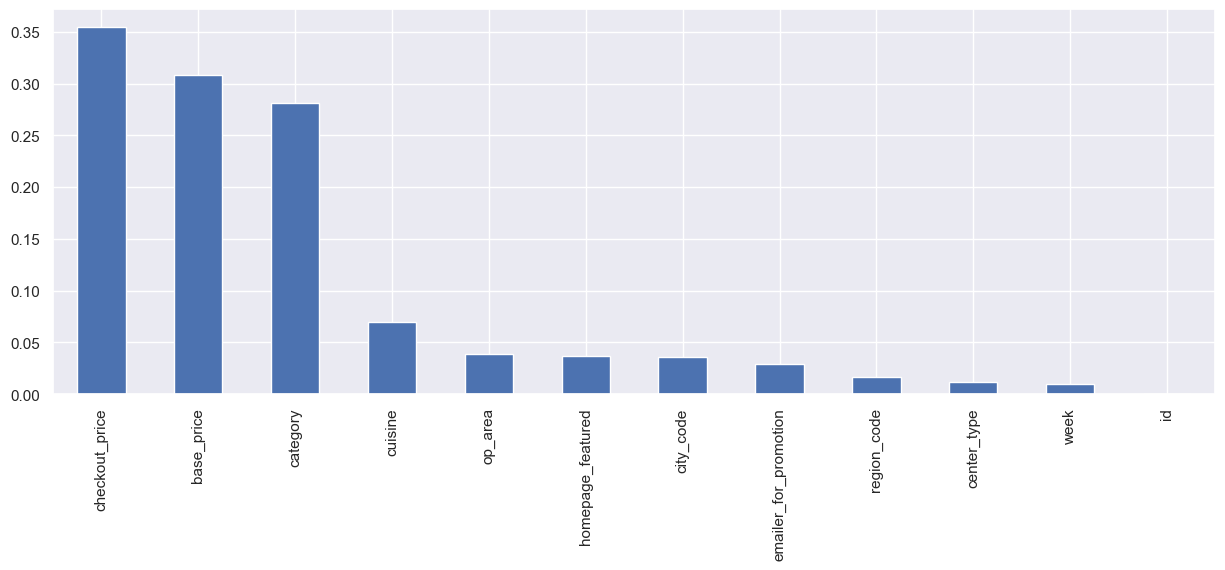

In [46]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [47]:
from sklearn.feature_selection import SelectPercentile
selected_top_columns = SelectPercentile(mutual_info_regression, percentile=20)
selected_top_columns.fit(X_train, y_train)
selected_top_columns.get_support()

array([False, False, False, False, False, False,  True, False,  True,
        True, False, False])

In [48]:
X_train.columns[selected_top_columns.get_support()]

Index(['category', 'checkout_price', 'base_price'], dtype='object')

In [49]:
X_train = X_train[['category', 'checkout_price', 'base_price']]
X_test = X_test[['category', 'checkout_price', 'base_price']]

# Converting to Arrays

In [50]:
X_train = np.array(X_train)
X_train

array([[ 11.  , 612.13, 611.13],
       [  2.  , 388.03, 486.03],
       [  4.  , 484.03, 581.03],
       ...,
       [ 13.  , 290.03, 292.03],
       [  9.  , 310.43, 310.43],
       [  5.  , 281.33, 280.33]])

In [51]:
X_test = np.array(X_test)
X_test

array([[  1.  , 484.03, 484.03],
       [  0.  , 183.36, 183.36],
       [  0.  , 121.31, 119.31],
       ...,
       [  0.  ,  93.15, 153.26],
       [  1.  , 445.23, 446.23],
       [ 10.  , 329.86, 329.86]])

In [52]:
y_train = np.array(y_train)
y_train

array([ 68, 203, 161, ..., 230, 514,  81])

In [53]:
y_test = np.array(y_test)
y_test

array([ 69, 514, 323, ...,  13,  28, 392])

# Model Building
Train and Test the model algorithms

In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost

# from sklearn.ensemble import RandomForestRegressor
# from sklearn import linear_model
# from sklearn.svm import SVR

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV, KFold
from sklearn import metrics

Since this is a regression problem, the evaluation metric is Error.

In [55]:
params = { 'max_depth': [3, 5, 6, 10],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.6, 1.0, 0.2),
           'colsample_bytree': np.arange(0.5, 1.0, 0.2),
           'n_estimators': [100, 500]}
xgbr = xgboost.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=10,
                         verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters: {'subsample': 0.6, 'n_estimators': 500, 'max_depth': 10, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Lowest RMSE:  274.5119763594635


In [57]:
xg = xgboost.XGBRegressor(subsample=0.6, n_estimators=500, max_depth=10, learning_rate=0.01, colsample_bytree=0.7)
xg.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

y_pred = xg.predict(X_test)
y_pred[y_pred<0] = 0
XG_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
XG_MAE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
XG_MSLE = metrics.mean_squared_log_error(y_test, y_pred)
XG_R2 = metrics.r2_score(y_test, y_pred)

In [58]:
LR = LinearRegression()
LR.fit(X_train, y_train)

y_pred = LR.predict(X_test)
y_pred[y_pred<0] = 0
LR_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
LR_MAE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
LR_MSLE = metrics.mean_squared_log_error(y_test, y_pred)
LR_R2 = metrics.r2_score(y_test, y_pred)

In [59]:
L = Lasso()
L.fit(X_train, y_train)

y_pred = L.predict(X_test)
y_pred[y_pred<0]=0
L_RMSE =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
L_MAE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
L_MSLE =  metrics.mean_squared_log_error(y_test, y_pred)
L_R2 = metrics.r2_score(y_test, y_pred)

In [60]:
EN = ElasticNet()
EN.fit(X_train, y_train)

y_pred = EN.predict(X_test)
y_pred[y_pred<0] = 0
ER_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
ER_MAE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
ER_MSLE = metrics.mean_squared_log_error(y_test, y_pred)
ER_R2 = metrics.r2_score(y_test, y_pred)

In [61]:
param_grid = {
    "max_depth": [3,5,10,15,20,None],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

dtr = DecisionTreeRegressor()
grid_cv = GridSearchCV(dtr, param_grid, cv = 5, n_jobs=-1).fit(X_train, y_train)

print("Best Parameters : ", grid_cv.best_params_)

Best Parameters :  {'max_depth': 15, 'min_samples_leaf': 5, 'min_samples_split': 2}


In [62]:
DT = DecisionTreeRegressor(max_depth=15, min_samples_leaf=5, min_samples_split=2)
DT.fit(X_train, y_train)

y_pred = DT.predict(X_test)
y_pred[y_pred<0] = 0
DT_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
DT_MAE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
DT_MSLE = metrics.mean_squared_log_error(y_test, y_pred)
DT_R2 = metrics.r2_score(y_test, y_pred)

In [63]:
KNN = KNeighborsRegressor()
KNN.fit(X_train, y_train)

y_pred = KNN.predict(X_test)
y_pred[y_pred<0] = 0
KNN_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
KNN_MAE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
KNN_MSLE = metrics.mean_squared_log_error(y_test, y_pred)
KNN_R2 = metrics.r2_score(y_test, y_pred)

In [64]:
GB = GradientBoostingRegressor()
GB.fit(X_train, y_train)

y_pred = GB.predict(X_test)
y_pred[y_pred<0] = 0
GB_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
GB_MAE = np.sqrt(metrics.mean_absolute_error(y_test, y_pred))
GB_MSLE = metrics.mean_squared_log_error(y_test, y_pred)
GB_R2 = metrics.r2_score(y_test, y_pred)

In [65]:
errors = pd.DataFrame(
    {
        'Root Mean Squared Error': [XG_RMSE, LR_RMSE, L_RMSE, ER_RMSE, DT_RMSE, KNN_RMSE, GB_RMSE], 
        'Mean Absolute Error': [XG_MAE, LR_MAE, L_MAE, ER_MAE, DT_MAE, KNN_MAE, GB_MAE], 
        'Mean Squared Log Error': [XG_MSLE, LR_MSLE, L_MSLE, ER_MSLE, DT_MSLE, KNN_MSLE, GB_MSLE],
        'R Squared Score' : [XG_R2, LR_R2, L_R2, ER_R2, DT_R2, KNN_R2, GB_R2]
    }
)
errors.index = ['XG Boost Regressor', 'Linear Regression', 'Lasso Regression', 'Elastic Net Regressor', 'Decision Tree Regressor', 'KNeighbors Regressor', 'Gradient Boosting Regressor']

In [66]:
errors

,Root Mean Squared Error,Mean Absolute Error,Mean Squared Log Error,R Squared Score
XG Boost Regressor,279.679954,11.674354,0.647145,0.511217
Linear Regression,376.723089,14.416945,2.274500,0.113175
Lasso Regression,376.724367,14.417134,2.272309,0.113169
Elastic Net Regressor,376.728748,14.418316,2.270122,0.113148
Decision Tree Regressor,286.405440,11.681244,0.617144,0.487427
KNeighbors Regressor,295.496211,11.994712,0.667493,0.454371
Gradient Boosting Regressor,303.420385,12.369859,0.826559,0.424715


In [67]:
from sklearn.model_selection import KFold, cross_val_score
cv = KFold(n_splits=10)
print('TRAIN DATA VALIDATION')
print("XGB             : " + str(cross_val_score(xg, X_train, y_train ,cv=cv).mean()))
print("LinearRegression: " + str(cross_val_score(LR, X_train, y_train ,cv=cv).mean()))
print("Lasso           : " + str(cross_val_score(L, X_train, y_train ,cv=cv).mean()))
print("Decision Tree   : " + str(cross_val_score(DT, X_train, y_train ,cv=cv).mean()))
print("KNN             : " + str(cross_val_score(KNN, X_train, y_train ,cv=cv).mean()))
print("GradientBoost   : " + str(cross_val_score(GB, X_train, y_train ,cv=cv).mean()))

print('\n\n')
print('TEST DATA VALIDATION')
print("XGB             : " + str(cross_val_score(xg, X_test, y_test ,cv=cv).mean()))
print("LinearRegression: " + str(cross_val_score(LR, X_test, y_test ,cv=cv).mean()))
print("Lasso           : " + str(cross_val_score(L, X_test, y_test ,cv=cv).mean()))
print("Decision Tree   : " + str(cross_val_score(DT, X_test, y_test ,cv=cv).mean()))
print("KNN             : " + str(cross_val_score(KNN, X_test, y_test ,cv=cv).mean()))
print("GradientBoost   : " + str(cross_val_score(GB, X_test, y_test ,cv=cv).mean()))

TRAIN DATA VALIDATION
XGB             : 0.517355074228653
LinearRegression: 0.1142131977940504
Lasso           : 0.11421306670736267
Decision Tree   : 0.48674124048089257
KNN             : 0.4512808914412324
GradientBoost   : 0.4357292685558679



TEST DATA VALIDATION
XGB             : 0.4896161948407777
LinearRegression: 0.11252750493631566
Lasso           : 0.11252734960482787
Decision Tree   : 0.45695876440878125
KNN             : 0.4311895840332582
GradientBoost   : 0.42465554176110076


Based on the above results, XG Boost Regressor seems to give us a better score. Hence we select that.

# Save the model

In [76]:
xg.save_model('model_xgb.txt')

In [77]:
model2 = xgboost.XGBRegressor()
model2.load_model("model_xgb.txt")

# Sample Predictions

In [70]:
X_test

array([[  1.  , 484.03, 484.03],
       [  0.  , 183.36, 183.36],
       [  0.  , 121.31, 119.31],
       ...,
       [  0.  ,  93.15, 153.26],
       [  1.  , 445.23, 446.23],
       [ 10.  , 329.86, 329.86]])

In [71]:
y_pred = model2.predict(X_test)
pd.DataFrame({'y_true' : y_test, 'y_predicted' : y_pred})

,y_true,y_predicted
0,69,27.626884
1,514,385.156799
2,323,375.842987
3,13,36.769726
4,14,69.073814
...,...,...
136960,13,0.129219
136961,582,797.843384
136962,13,105.919884
136963,28,31.961966


In [72]:
round(model2.predict([[11,523.4,202.16]])[0])

391

In [73]:
round(model2.predict([[0,232,199]])[0])

331

In [74]:
round(model2.predict([[1.,546,650]])[0])

36

In [75]:
round(model2.predict([[5., 251.61589, 205.74163]])[0])

370